In [292]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

Text(0.5, 1.0, 'Imagem Original')

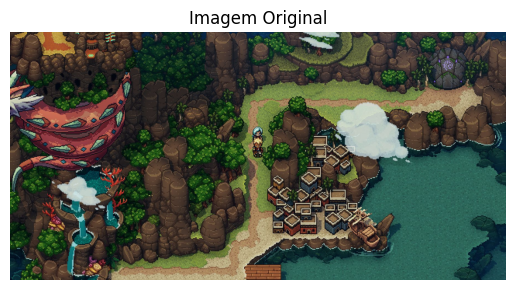

In [293]:
dicionario = {'Floresta': 'Mapas/Floresta.jpeg', 'Trilha':'Mapas/Trilha.jpeg'}
escolha = 'Trilha' 
original_image = Image.open(dicionario[escolha])
cv2_img = np.array(original_image)
plt.imshow(cv2_img)
plt.axis('off')
plt.title('Imagem Original')

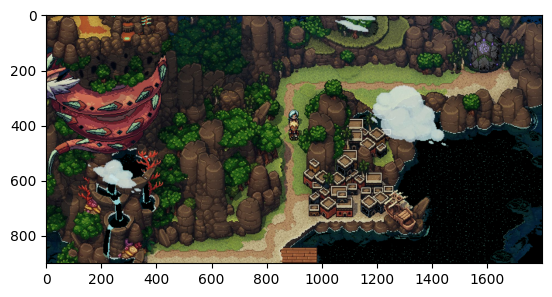

In [294]:
sem_azul_image = cv2_img.copy()
# Definir os limites para detecção da cor azul
limite_inferior = np.array([0, 50, 50])  # Azul escuro
limite_superior = np.array([60, 255, 255 ])  # Azul claro

# Criar uma máscara para pixels azuis
mascara_azul = cv2.inRange(cv2_img, limite_inferior, limite_superior)

# Substituir pixels azuis por preto na imagem originalm
sem_azul_image[mascara_azul != 0] = [0, 0, 0]
plt.imshow(sem_azul_image)

In [295]:
'''
imagem_hsv = cv2.cvtColor(sem_azul_image, cv2.COLOR_BGR2HSV)


# Calcular a saturação da imagem
saturacao = imagem_hsv[:,:,1]

# Definir um limite para identificar áreas de baixa saturação
limite_saturacao = 70  # Ajuste conforme necessário

# Calcular o desvio padrão da saturação
desvio_padrao_saturacao = np.std(saturacao)

# Aplicar o aumento de contraste apenas nas áreas com baixa saturação
contraste_aumentado = cv2.convertScaleAbs(sem_azul_image, alpha=2, beta=0)

# Aplicar a máscara nas áreas com baixa saturação
imagem_contraste_aumentado = sem_azul_image.copy()
imagem_contraste_aumentado[desvio_padrao_saturacao < limite_saturacao] = contraste_aumentado[desvio_padrao_saturacao < limite_saturacao]

# Exibir a imagem original e a imagem com aumento de contraste nas áreas com alta saturação
plt.imshow(imagem_contraste_aumentado)
'''


'\nimagem_hsv = cv2.cvtColor(sem_azul_image, cv2.COLOR_BGR2HSV)\n\n\n# Calcular a saturação da imagem\nsaturacao = imagem_hsv[:,:,1]\n\n# Definir um limite para identificar áreas de baixa saturação\nlimite_saturacao = 70  # Ajuste conforme necessário\n\n# Calcular o desvio padrão da saturação\ndesvio_padrao_saturacao = np.std(saturacao)\n\n# Aplicar o aumento de contraste apenas nas áreas com baixa saturação\ncontraste_aumentado = cv2.convertScaleAbs(sem_azul_image, alpha=2, beta=0)\n\n# Aplicar a máscara nas áreas com baixa saturação\nimagem_contraste_aumentado = sem_azul_image.copy()\nimagem_contraste_aumentado[desvio_padrao_saturacao < limite_saturacao] = contraste_aumentado[desvio_padrao_saturacao < limite_saturacao]\n\n# Exibir a imagem original e a imagem com aumento de contraste nas áreas com alta saturação\nplt.imshow(imagem_contraste_aumentado)\n'

Text(0.5, 1.0, 'Imagem em Escala de Cinza')

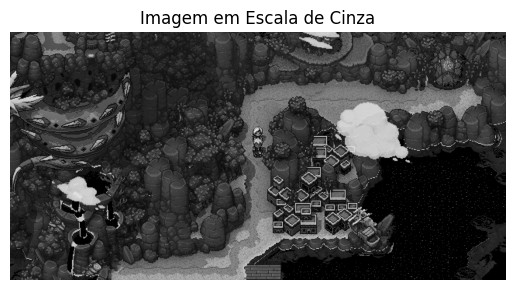

In [296]:
gray_image = cv2.cvtColor(sem_azul_image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.title('Imagem em Escala de Cinza')


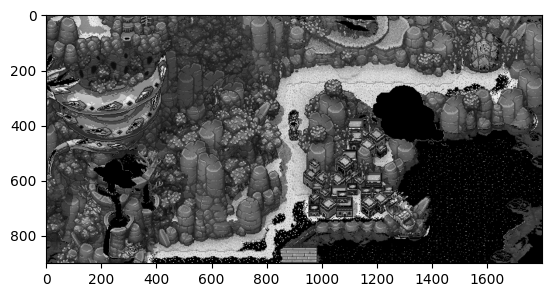

In [297]:
histograma = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Calcular o desvio padrão do histograma
desvio_padrao = np.std(histograma)

# Definir um limite para identificar áreas de alto contraste
limite_contraste = 150  # Ajuste conforme necessário

# Criar uma máscara booleana com o mesmo tamanho que a imagem
mascara = gray_image > limite_contraste

# Substituir áreas de alto contraste por preto
imagem_sem_nuvem = gray_image.copy()
imagem_sem_nuvem[mascara] = 0

# Exibir a imagem resultante
plt.imshow(imagem_sem_nuvem, cmap='gray')

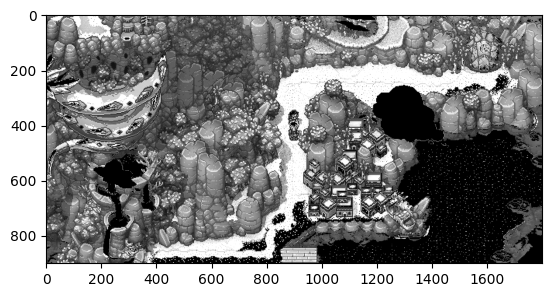

In [298]:
alpha = 1.5  # Fator de aumento de contraste
beta = 100  # Valor de compensação
contrast_image = cv2.convertScaleAbs(imagem_sem_nuvem, alpha=alpha, beta=beta)
plt.imshow(contrast_image, cmap='gray')


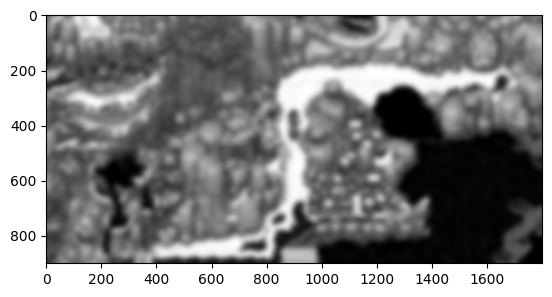

In [299]:
# Aplicar filtro de desfoque
kernel = (15,15)
desvio_padrao = 100
blurred_image = cv2.GaussianBlur(contrast_image, kernel, desvio_padrao)
blurred_image = cv2.GaussianBlur(blurred_image, kernel, desvio_padrao)
blurred_image = cv2.GaussianBlur(blurred_image, kernel, desvio_padrao)
blurred_image = cv2.GaussianBlur(blurred_image, kernel, desvio_padrao)
blurred_image = cv2.GaussianBlur(blurred_image, kernel, desvio_padrao)
plt.imshow(blurred_image, cmap='gray')
# Aplicar filtro de média
#averaged_image = cv2.blur(image, (kernel_width, kernel_height))

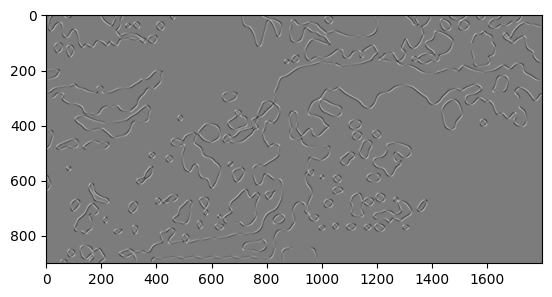

In [300]:
# Aplicar detecção de bordas usando o operador de Sobel
_, thresholded_image = cv2.threshold(blurred_image, 180, 200, cv2.THRESH_BINARY)
edges = cv2.Sobel(thresholded_image, cv2.CV_64F, 1, 1, ksize=15)
edges = cv2.normalize(edges, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
plt.imshow(edges, cmap = 'gray')

True

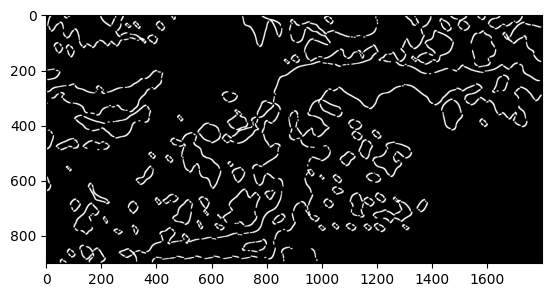

In [301]:
_, binary_image = cv2.threshold(edges, 127, 255, cv2.THRESH_BINARY)

# Exibir a imagem binarizada
plt.imshow(binary_image, cmap='gray')
cv2.imwrite(f'results/{escolha}_edges.jpeg', binary_image)

True

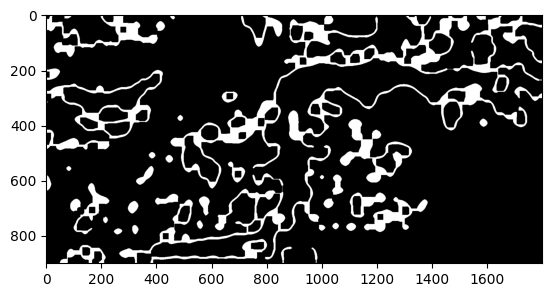

In [302]:
# Definir um kernel para operações de morfologia
kernel = np.ones((10,10), np.uint8)
#kernel1 = np.ones((15,15), np.uint8)
# Fechar as falhas nas bordas
#smoothed_image = cv2.GaussianBlur(edges, (1, 1), 0)
#edges_closed = cv2.morphologyEx(smoothed_image, cv2.MORPH_CLOSE, kernel)
#edges_closed = cv2.Scharr(edges, cv2.CV_64F, 1, 0)
#edges_closed = cv2.morphologyEx(edges_closed, cv2.MORPH_CLOSE, kernel1)
edges_closed = cv2.Canny(edges, 10, 1)

# Definir um kernel para operações de morfologia
kernel = np.ones((5,5), np.uint8)


smoothed_image = cv2.GaussianBlur(edges_closed, (9, 9), 0)
smoothed_image = cv2.GaussianBlur(smoothed_image, (9, 9), 0)
smoothed_image = cv2.GaussianBlur(smoothed_image, (9, 9), 0)
smoothed_image = cv2.GaussianBlur(smoothed_image, (9, 9), 0)
smoothed_image = cv2.GaussianBlur(smoothed_image, (9, 9), 0)
# Fechar as falhas nos traços
edges_closed = cv2.morphologyEx(smoothed_image, cv2.MORPH_CLOSE, kernel)
# Erodir as linhas para reduzi-las de volta ao tamanho original ou próximo dele
edges_closed = cv2.erode(edges_closed, kernel, iterations=4)

edges_binary = cv2.threshold(edges_closed, 0, 255, cv2.THRESH_BINARY)[1]
plt.imshow(edges_binary, cmap='grey')
cv2.imwrite(f'results/{escolha}_contorno.jpeg', edges_binary)